In [3]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook config
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


In [4]:
# Step 2: Load the Benin dataset
file_path = '../data/benin_raw.csv'

df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Preview first few rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
# Step 3: Check shape and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("Column names:")
print(df.columns.tolist())


Number of rows: 525600
Number of columns: 19
Column names:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [6]:
# Step 4a: Summary statistics
df.describe()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


In [7]:
# Step 4b: Check percentage of missing values per column
missing_percent = df.isna().mean().sort_values(ascending=False) * 100
missing_percent[missing_percent > 0]


Comments    100.0
dtype: float64

In [8]:
# Step 5: Drop the Comments column
df = df.drop(columns=['Comments'])


In [9]:
# Step 6: Clip negative irradiance to zero
for col in ['GHI', 'DNI', 'DHI']:
    df[col] = df[col].clip(lower=0)


In [10]:
# Step 7 (Alternative): Outlier removal using manual Z-score
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute mean and standard deviation for each column
means = df[numeric_cols].mean()
stds  = df[numeric_cols].std()

# Compute Z-score DataFrame
z_scores = (df[numeric_cols] - means) / stds

# Create a mask for rows where all |Z| < 3
mask = (z_scores.abs() < 3).all(axis=1)

# Apply mask to get cleaned DataFrame
df_clean = df[mask].copy()

print(f"Rows before cleaning: {df.shape[0]}")
print(f"Rows after cleaning:  {df_clean.shape[0]}")


Rows before cleaning: 525600
Rows after cleaning:  517707


In [11]:
# Step 8: Export cleaned data
output_path = '../data/benin_clean.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")


Cleaned data saved to ../data/benin_clean.csv


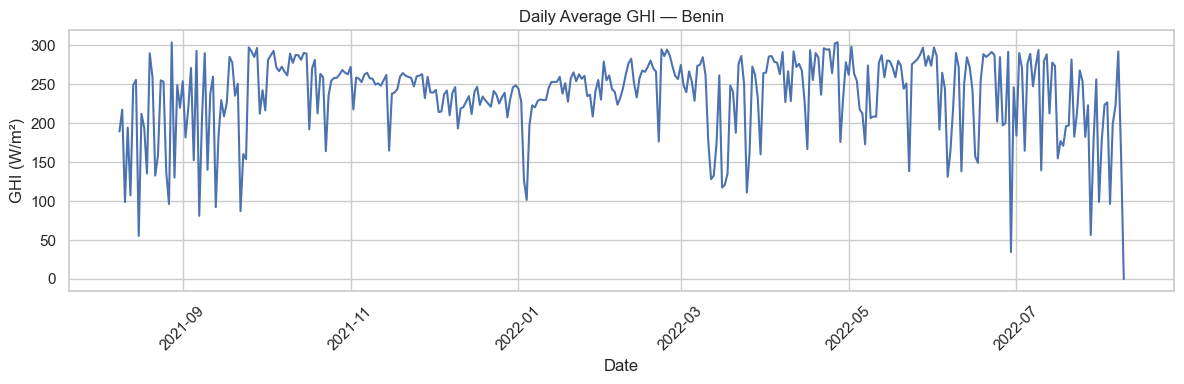

In [12]:
# Time series plot for GHI over the first month
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_clean.set_index('Timestamp')['GHI'].resample('D').mean())
plt.title('Daily Average GHI — Benin')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.tight_layout()


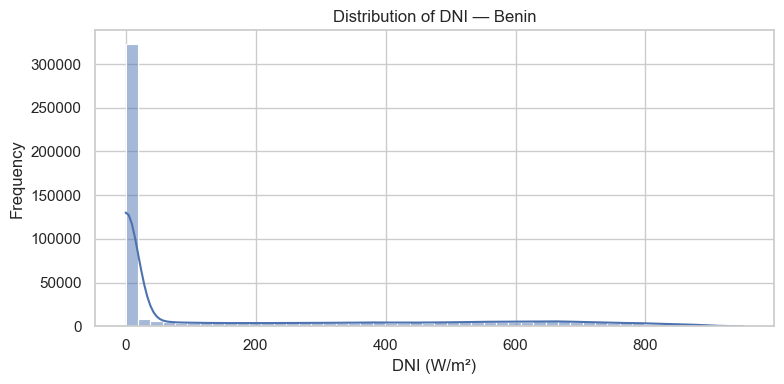

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['DNI'], bins=50, kde=True)
plt.title('Distribution of DNI — Benin')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')
plt.tight_layout()



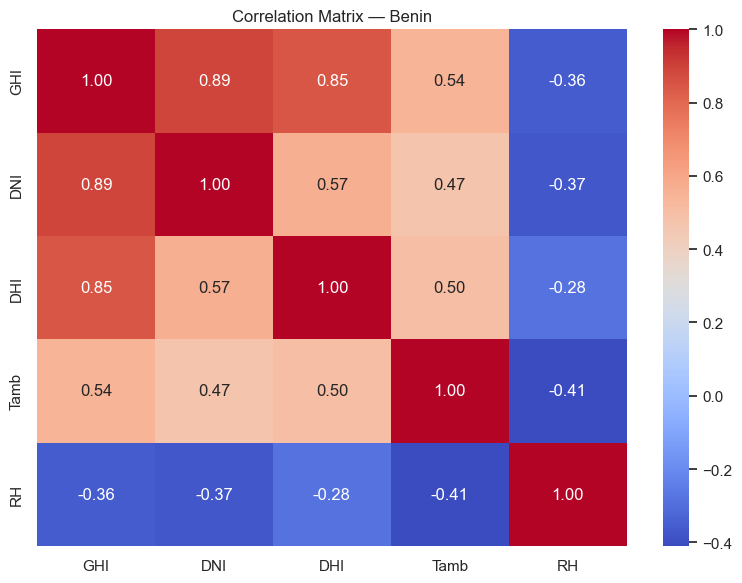

In [14]:
plt.figure(figsize=(8, 6))
corr = df_clean[['GHI', 'DNI', 'DHI', 'Tamb', 'RH']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix — Benin')
plt.tight_layout()


## Key Observations — Benin Dataset

### 1. Daily GHI Pattern
- GHI varies daily with clear weather-related drops.
- Daily average values range between 200–300 W/m², typical for tropical regions.
- Sharp dips in some weeks likely reflect seasonal rains or heavy clouds.

### 2. DNI Distribution
- DNI values are strongly right-skewed.
- Most readings are near zero, indicating frequent cloud cover or nighttime.
- High DNI values above 600 W/m² occur less often but represent peak sun hours.

### 3. Correlation Matrix
- GHI, DNI, and DHI are highly correlated (r > 0.85).
- Tamb (ambient temperature) moderately correlates with irradiance.
- RH (humidity) is negatively correlated with solar and temperature values — higher humidity usually means lower sunlight.

### Overall
The dataset reflects realistic environmental behavior and is now cleaned for further modeling or analysis.
